In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import LabelEncoder
from pathlib import Path
from sklearn.decomposition import PCA
from aging.plotting import PlotConfig, save_factory, format_plots, figure

import colorcet as cc

In [94]:
format_plots()
c = PlotConfig()
saver = save_factory(c.save_path / "longtogeny-trajectory", tight_layout=False)

In [172]:
path = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_02/longtogeny_musages_mtx_most_used.parquet')
mdf = pd.read_parquet(path)

In [173]:
mdf.head()

syllables                                                                   0   \
age mouse cage experiment       uuid                                             
21  01_01 01   longtogeny_males 2c031642-6e7a-4b1a-8b0c-eaa2f28ef089  0.048960   
    01_02 01   longtogeny_males 181340b6-6c1d-4528-8920-2102d75d5711  0.038551   
    01_03 01   longtogeny_males b29c4d14-3e47-4ab9-8744-fb45862cc03c  0.036003   
    01_04 01   longtogeny_males b9459d2b-2357-427a-ad23-1b447a7621ea  0.039577   
    02_01 02   longtogeny_males b1884a07-9d38-44e7-916b-b2d6b4e0b985  0.037646   

syllables                                                                   3   \
age mouse cage experiment       uuid                                             
21  01_01 01   longtogeny_males 2c031642-6e7a-4b1a-8b0c-eaa2f28ef089  0.020797   
    01_02 01   longtogeny_males 181340b6-6c1d-4528-8920-2102d75d5711  0.017650   
    01_03 01   longtogeny_males b29c4d14-3e47-4ab9-8744-fb45862cc03c  0.013593   
    01_04 01   longtogeny_males b9459d2b-2357-427a-ad23-1b447a7621ea  0.018408   
    02_01 02   longtogeny_males b1884a07-9d38-44e7-916b-b2d6b4e0b985  0.004772   

syllables                                                                   6   \
age mouse cage experiment       uuid                                             
21  01_01 01   longtogeny_males 2c031642-6e7a-4b1a-8b0c-eaa2f28ef089  0.000867   
    01_02 01   longtogeny_males 181340b6-6c1d-4528-8920-2102d75d5711  0.004180   
    01_03 01   longtogeny_males b29c4d14-3e47-4ab9-8744-fb45862cc03c  0.000735   
    01_04 01   longtogeny_males b9459d2b-2357-427a-ad23-1b447a7621ea  0.000460   
    02_01 02   longtogeny_males b1884a07-9d38-44e7-916b-b2d6b4e0b985  0.002651   

syllables                                                                   7   \
age mouse cage experiment       uuid                                             
21  01_01 01   longtogeny_males 2c031642-6e7a-4b1a-8b0c-eaa2f28ef089  0.050260   
    01_02 01   longtogeny_males 181340b6-6c1d-4528-8920-2102d75d5711  0.040409   
    01_03 01   longtogeny_males b29c4d14-3e47-4ab9-8744-fb45862cc03c  0.037472   
    01_04 01   longtogeny_males b9459d2b-2357-427a-ad23-1b447a7621ea  0.068569   
    02_01 02   longtogeny_males b1884a07-9d38-44e7-916b-b2d6b4e0b985  0.050901   

syllables                                                                   10  \
age mouse cage experiment       uuid                                             
21  01_01 01   longtogeny_males 2c031642-6e7a-4b1a-8b0c-eaa2f28ef089  0.022964   
    01_02 01   longtogeny_males 181340b6-6c1d-4528-8920-2102d75d5711  0.026010   
    01_03 01   longtogeny_males b29c4d14-3e47-4ab9-8744-fb45862cc03c  0.009919   
    01_04 01   longtogeny_males b9459d2b-2357-427a-ad23-1b447a7621ea  0.019328   
    02_01 02   longtogeny_males b1884a07-9d38-44e7-916b-b2d6b4e0b985  0.009544   

syllables                                                                   13  \
age mouse cage experiment       uuid                                             
21  01_01 01   longtogeny_males 2c031642-6e7a-4b1a-8b0c-eaa2f28ef089  0.005633   
    01_02 01   longtogeny_males 181340b6-6c1d-4528-8920-2102d75d5711  0.008360   
    01_03 01   longtogeny_males b29c4d14-3e47-4ab9-8744-fb45862cc03c  0.008082   
    01_04 01   longtogeny_males b9459d2b-2357-427a-ad23-1b447a7621ea  0.004602   
    02_01 02   longtogeny_males b1884a07-9d38-44e7-916b-b2d6b4e0b985  0.006893   

syllables                                                                   14  \
age mouse cage experiment       uuid                                             
21  01_01 01   longtogeny_males 2c031642-6e7a-4b1a-8b0c-eaa2f28ef089  0.011698   
    01_02 01   longtogeny_males 181340b6-6c1d-4528-8920-2102d75d5711  0.019043   
    01_03 01   longtogeny_males b29c4d14-3e47-4ab9-8744-fb45862cc03c  0.007348   
    01_04 01   longtogeny_males b9459d2b-2357-427a-ad23-1b447a7621ea  0.012885   
    02_01 02   longtogeny_males b1884a07-9d38-44e7-916b-b2

In [221]:
usage_pcs = PCA(n_components=3).fit_transform(mdf)

In [222]:
pcs_df = pd.DataFrame(usage_pcs, index=mdf.index, columns=[f'pc_{x:02d}' for x in range(usage_pcs.shape[1])])

pcs_df['bin'] = pd.qcut(mdf.index.get_level_values('age'), 18, labels=False)

In [223]:
avg_pcs = pcs_df.groupby(['mouse', 'experiment', 'bin']).mean(numeric_only=True)

In [224]:
counts = avg_pcs.groupby('mouse')['pc_00'].count()

In [225]:
mask = counts[counts == 18].index

In [226]:
mask

Index(['01_01', '01_02', '01_03', '01_04', '02_01', '02_02', '02_03', '03_01',
       '03_02', '03_04', '04_01', '04_02', '04_03', '04_04'],
      dtype='object', name='mouse')

In [227]:
keep_pcs = avg_pcs[avg_pcs.index.get_level_values('mouse').isin(mask)]

/tmp/ipykernel_11241/3971832990.py:2: UserWarning: The palette list has more values (256) than needed (14), which may not be intended.
  ax = sns.lineplot(data=keep_pcs.reset_index(), x='pc_00', y='pc_01', hue='mouse', palette=cc.glasbey_light)


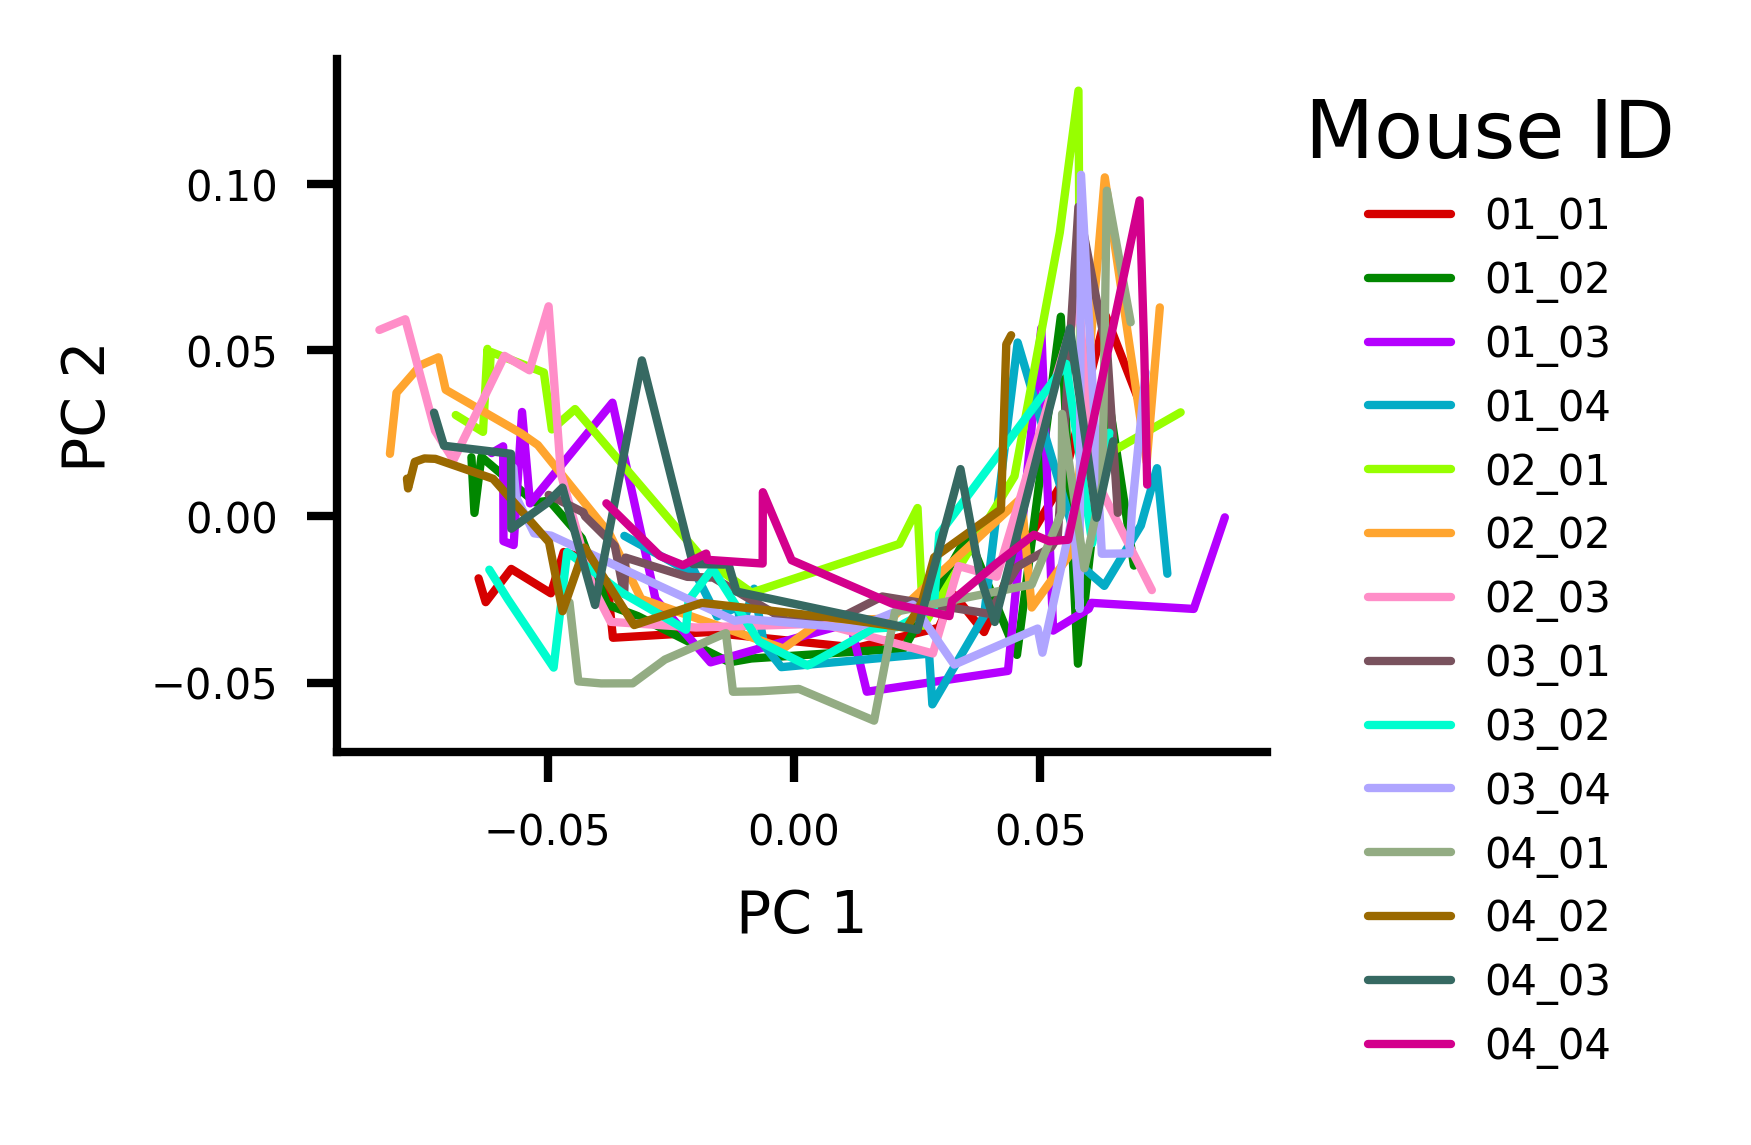

In [228]:
fig = figure(2, 1.5)
ax = sns.lineplot(data=keep_pcs.reset_index(), x='pc_00', y='pc_01', hue='mouse', palette=cc.glasbey_light)
ax.legend(frameon=False, loc='upper left', bbox_to_anchor=(1, 1), title="Mouse ID")
ax.set(xlabel="PC 1", ylabel="PC 2")
sns.despine()
saver(fig, "longtogeny-males-pc-trajectories");

In [229]:
def zscore(df):
    return (df - df.mean()) / df.std()

In [230]:
keep_pcs = zscore(keep_pcs)

In [231]:
mtx = []
for mouse, _df in keep_pcs.groupby('mouse'):
    # mtx.append(_df[['pc_00', 'pc_01']].to_numpy().T.flatten())
    mtx.append(_df.to_numpy().T.flatten())
mtx = np.array(mtx)

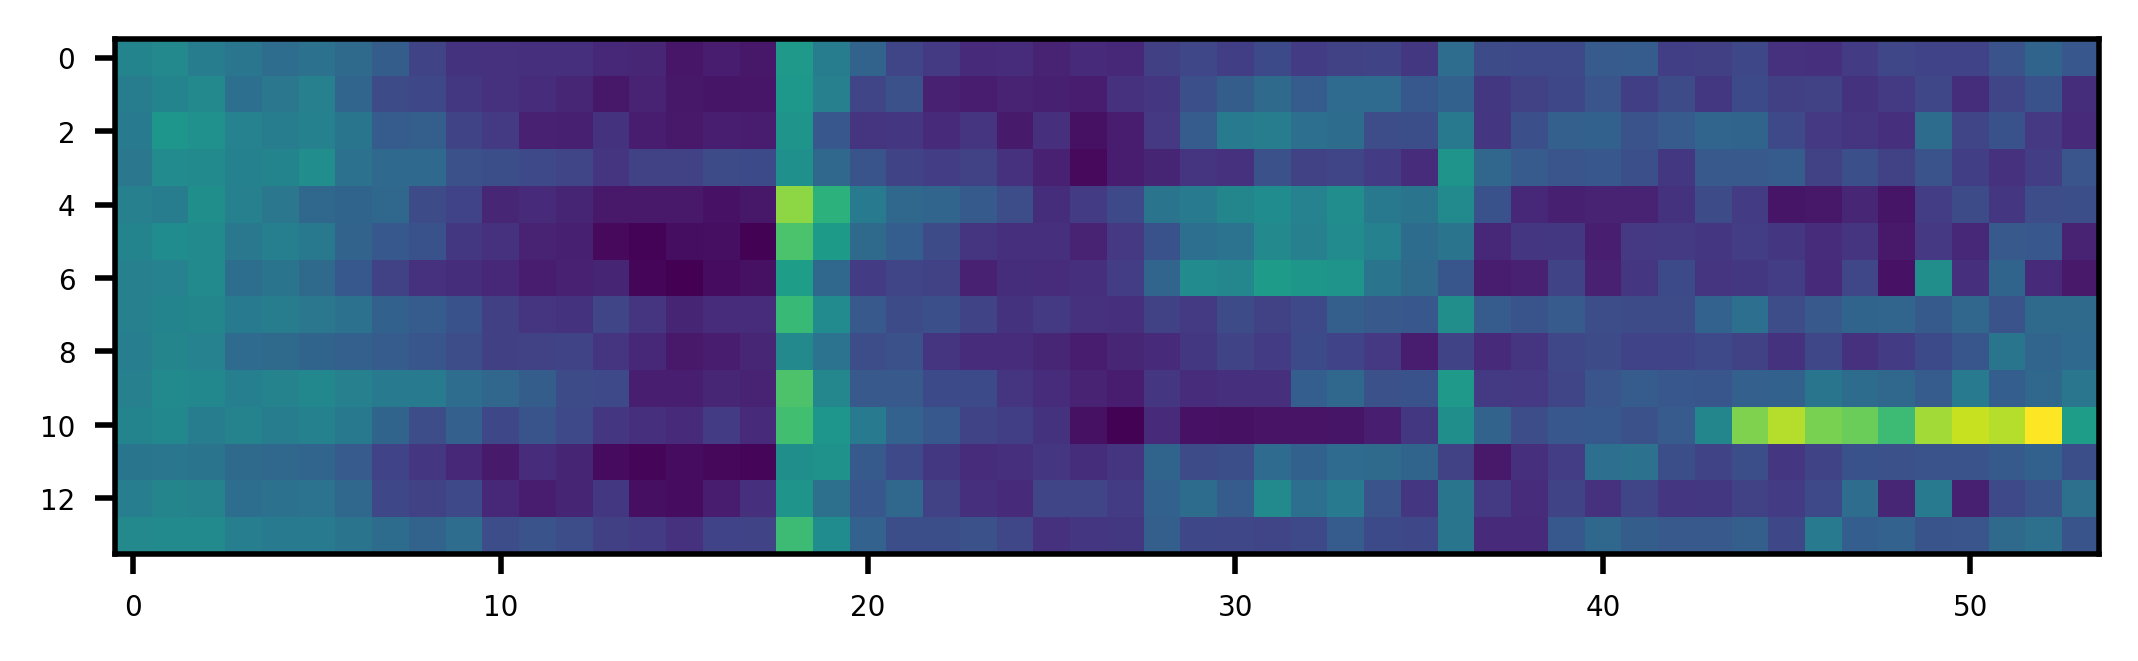

In [232]:
plt.imshow(mtx, cmap='viridis')

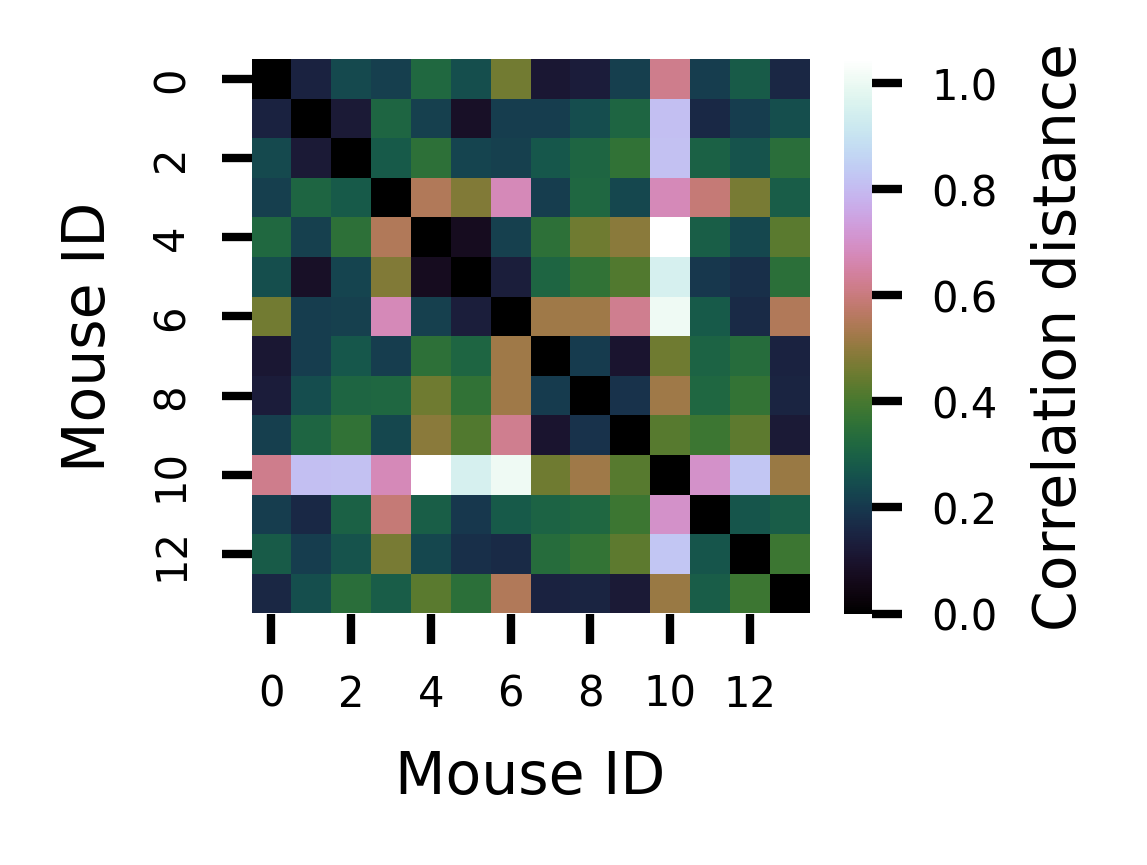

In [235]:
fig = figure(1.5, 1.2)
dists = pdist(mtx, metric="correlation")
true_mean_dist = dists.mean()
ax = sns.heatmap(
    squareform(dists),
    cmap="cubehelix",
    # vmax=2,
    cbar_kws=dict(label="Correlation distance"),
)
ax.set(xlabel="Mouse ID", ylabel="Mouse ID")
saver(fig, "correlation-dist-for-pcs-across-indiv");

/home/wg41/miniconda3/envs/aging/lib/python3.10/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


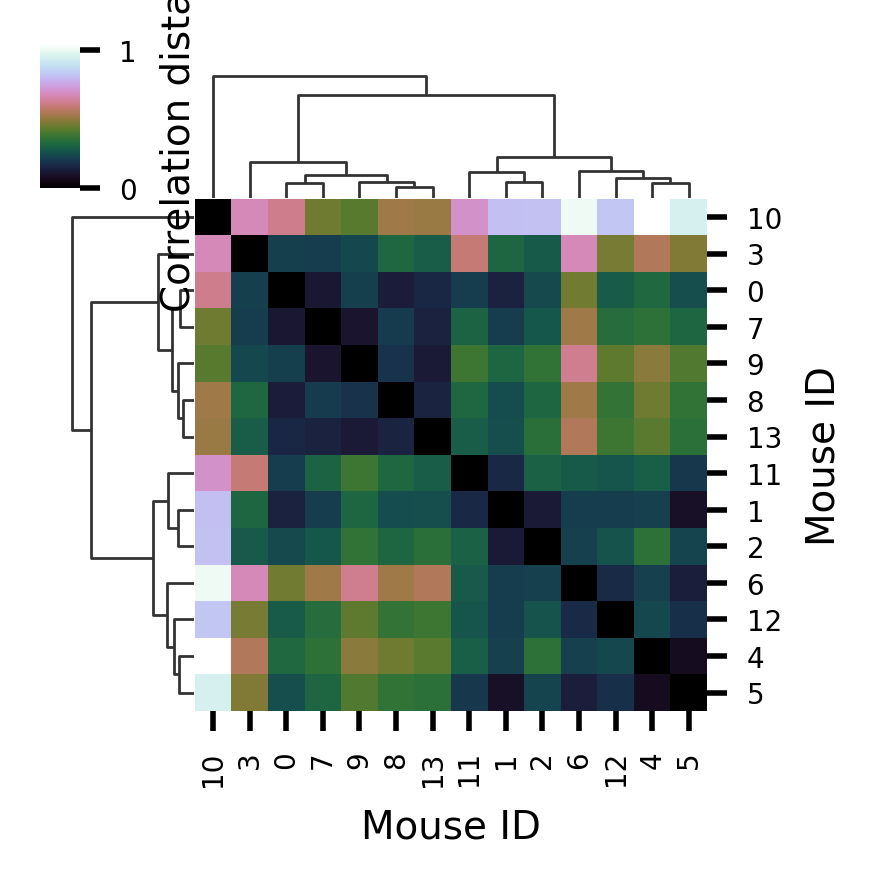

In [239]:
dists = pdist(mtx, metric="correlation")
true_mean_dist = dists.mean()
fg = sns.clustermap(
    squareform(dists),
    cmap="cubehelix",
    cbar_kws=dict(label="Correlation distance"), method='ward',
    figsize=(2, 2)
)
fg.ax_heatmap.set(xlabel="Mouse ID", ylabel="Mouse ID")
saver(fg.fig, "correlation-dist-for-pcs-across-indiv-sorted");

In [123]:
n_shuffs = 500
np.random.seed(0)

mean_dist = []
for i in range(n_shuffs):
    mtx = []
    for mouse, _df in keep_pcs.groupby('mouse'):
        row = _df[['pc_00', 'pc_01']].to_numpy().T.flatten()
        np.random.shuffle(row)
        mtx.append(row)
    mtx = np.array(mtx)
    dists = pdist(mtx, metric="correlation")
    mean_dist.append(dists.mean())

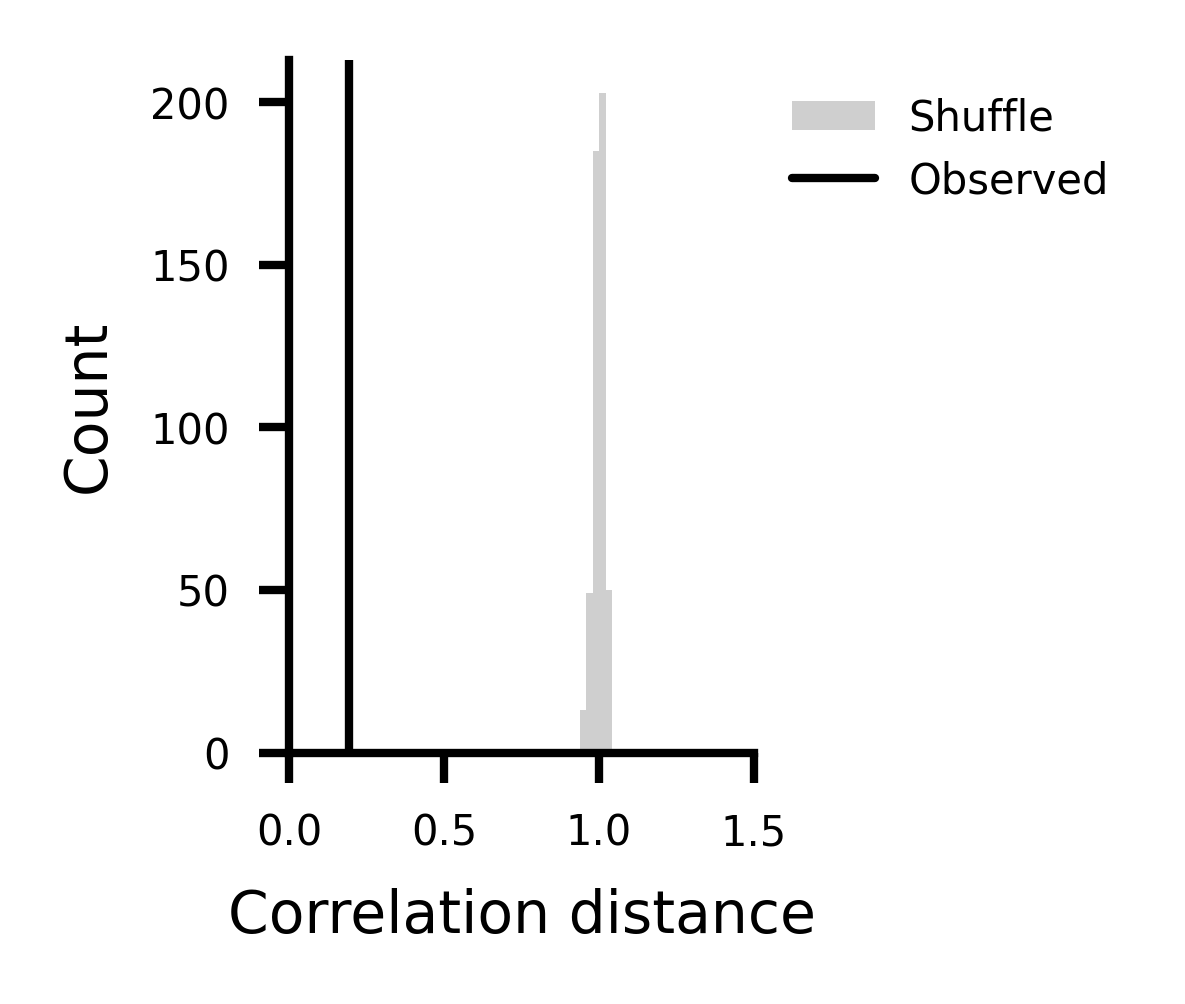

In [130]:
fig = figure(1, 1.5)
ax = sns.histplot(mean_dist, color='silver', fill=True, element='step', lw=0, bins=5, label="Shuffle")
ax.axvline(true_mean_dist, color='k', lw=1, label="Observed")
ax.set(xlim=(0, 1.5), xlabel='Correlation distance')
ax.legend(frameon=False, bbox_to_anchor=(1, 1), loc='upper left')
sns.despine()
saver(fig, "corr-dist-vs-shuffle-hist");

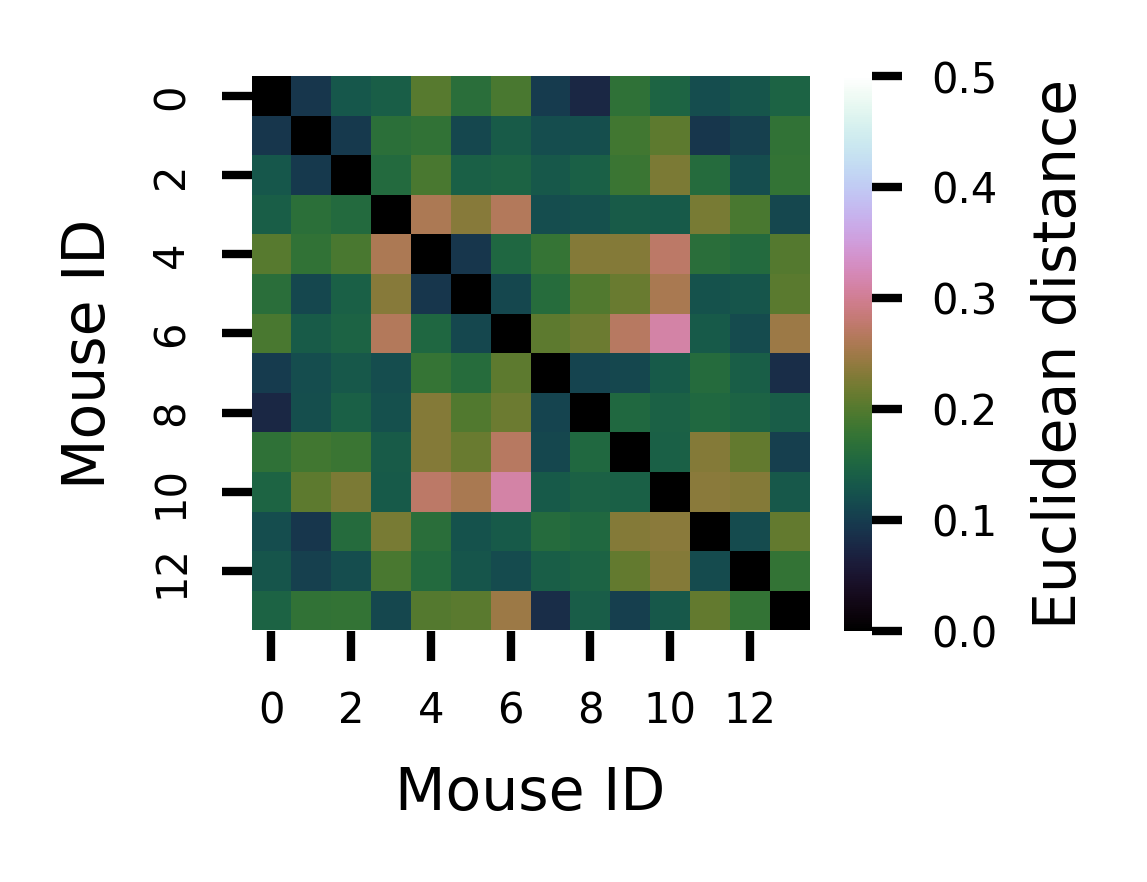

In [140]:
mtx = []
for mouse, _df in keep_pcs.groupby('mouse'):
    mtx.append(_df[['pc_00', 'pc_01']].to_numpy().T.flatten())
mtx = np.array(mtx)

fig = figure(1.5, 1.2)
dists = pdist(mtx, metric="euclidean")
true_mean_dist = dists.mean()
ax = sns.heatmap(
    squareform(dists),
    cmap="cubehelix",
    vmax=0.5,
    cbar_kws=dict(label="Euclidean distance"),
)
ax.set(xlabel="Mouse ID", ylabel="Mouse ID")
saver(fig, "euclidean-dist-for-pcs-across-indiv");

In [141]:
n_shuffs = 500
np.random.seed(0)

mean_dist = []
for i in range(n_shuffs):
    mtx = []
    for mouse, _df in keep_pcs.groupby('mouse'):
        row = _df[['pc_00', 'pc_01']].to_numpy().T.flatten()
        np.random.shuffle(row)
        mtx.append(row)
    mtx = np.array(mtx)
    dists = pdist(mtx, metric="euclidean")
    mean_dist.append(dists.mean())

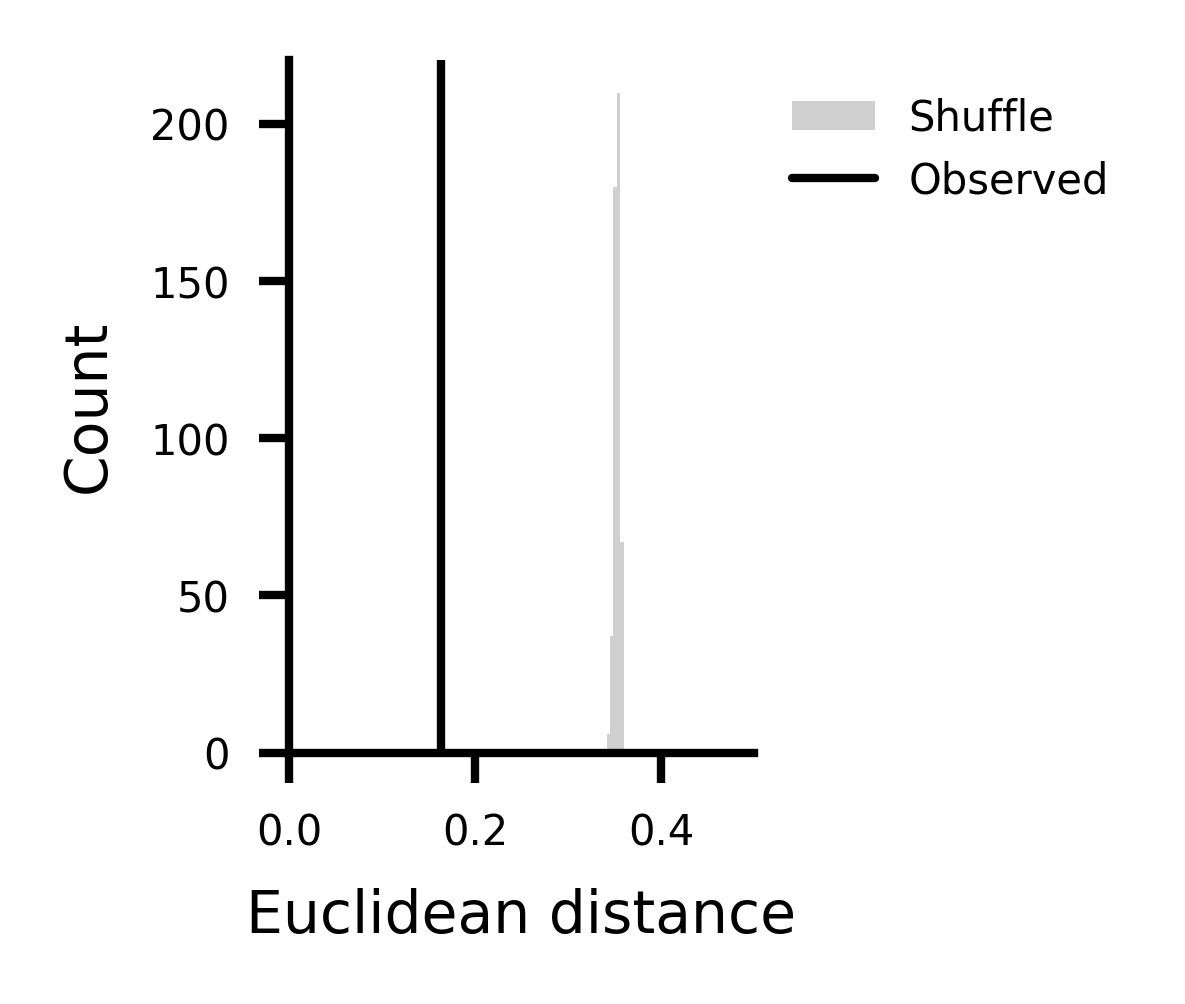

In [142]:
fig = figure(1, 1.5)
ax = sns.histplot(mean_dist, color='silver', fill=True, element='step', lw=0, bins=5, label="Shuffle")
ax.axvline(true_mean_dist, color='k', lw=1, label="Observed")
ax.set(xlim=(0, 0.5), xlabel='Euclidean distance')
ax.legend(frameon=False, bbox_to_anchor=(1, 1), loc='upper left')
sns.despine()
saver(fig, "euclidean-dist-vs-shuffle-hist");